<strong>University of Bellevue<br>
DSC550-T301 Data Mining (2235-1)<br>
Term Project: Milestone 1<br>
Arash Mahmoudian<br></strong>


<strong>Introduction</strong><br>
The financial and societal impact of traffic accidents exceeds hundreds of billions of dollars every year.  Therefore, reducing these accidents, remarkably major ones is always an important challenge. Therefore, understanding the nature of these incidents can help to take proactive actions and reduce the size of the impact. This can be done in diverse approaches, one of these proactive approaches is an accident and its severity prediction. Having this said “USA Car Accidents Severity” dataset from Kaggle has been selected. The dataset consists of 12 attributes for 4232541 records. The detail about the dataset is available via the link below:<br>
https://www.kaggle.com/code/jingzongwang/usa-car-accidents-severity-prediction<br>

In general, these attributes are categorized into five different categories described below:<br>
A-	12 <strong>Traffic</strong> attributes (ID, Source, TMC, Severity, Start_Time, End_time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Description)<br>
B-	9 <strong>Address</strong> attributes (Number, Street, Side, City, County, State, Zipcode, Country, Timezone)<br>
C-	11 <strong>Weather</strong> attributes (Airport_Code, Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition )<br>
D-	13 <strong>POI</strong> attributes (Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop)<br>

E-	4 <strong>Period-of-Day</strong> attributes (Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight)<br>

These features are collected from three different datasets listed below:<br> 
1-MapQuest: 2651861<br>
2-Bing: 1516064<br>
3-MapQuest-Bing: 64616<br>

<strong>Road Map</strong><br>
The first aim of this study is to find the key factors of an accident’s severity. After determining these key factors, we will attempt to build a model which enables us to predict the severity of the accident. To achieve these goals first the dataset will be loaded, then the data quality will be thoroughly examined, and corrective clean-ups will be applied to it if needed. Next, once the data is successfully cleaned up, the Data Exploratory Analysis will be performed to extract the hidden insights/relation between its attributes.<br>

## 1- Load Necessary Packages & Libraries

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from collections import Counter


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings("ignore")

## 2- Load the dataset (USA Car Accidents Severity)

* Number of observations: 4232541
* Number of features: 49
* Dataset load time: 1min 22s

In [2]:
%%time
df = pd.read_csv('US_Accidents_Dec20.csv')
print(df.shape)
df.info()

(4232541, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weat

### 1.1 - Print dataset head

In [3]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


## 3- Clean up, Data type change, Feature Engineering

* Convert the time stamps to datetime format
* Calculate accident durartion

In [4]:
# Convert the time stamps to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])


# Calculate accident durartion
df['Duration'] = df.End_Time - df.Start_Time 
df['Duration'] = df['Duration'].apply(lambda x:round(x.total_seconds() / 60) )

## 4- Exploratory Data Analysis (EDA)

### 4.1- SEVERITY

The accident severity is a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay). The dataset in general mostly consists of %71 of accidents severity level 2 and then %25 level 3, next is level 4 with %2.92 of observations.

Severity Level 2: 3006626   % 71.04
Severity Level 3: 1072821   % 25.35
Severity Level 4: 123782   % 2.92
Severity Level 1: 29312   % 0.69


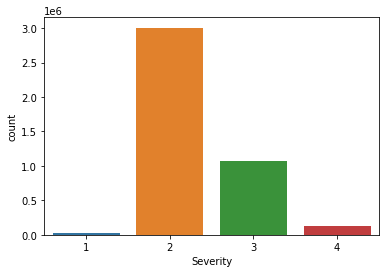

In [5]:
sev_sum = df['Severity'].value_counts().sum()
sev_vals = df['Severity'].value_counts()
for i,j in sev_vals.items():
    print(f'Severity Level {i}: {j}   % {round(j/sev_sum*100, 2)}')
ax = sns.countplot('Severity', data = df)

### 4.2- Accident Occurance Over Years

Number of incidents shows increas over the past years, most probably as more people owns vehicles and consequently an increase in the number of travels.

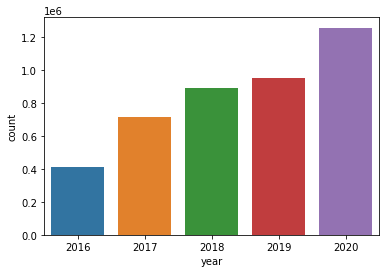

In [6]:
df['year'] = [x.year for x in df['Start_Time']]
ax = sns.countplot('year', data = df)

### 4.3 Accident Occurance Season
Furthermore, last 4 months of the year is when more accidents occured during that period of time.</br>
Number of sccidents shows an incremental trend over the time</br> 

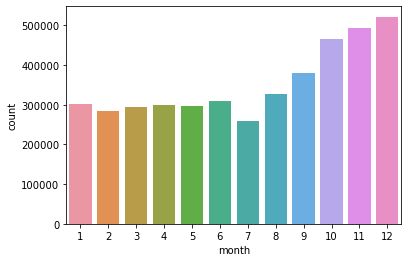

In [7]:
df['month'] = [x.month for x in df['Start_Time']]
ax = sns.countplot('month', data = df)

### 4.4- Accident Occurance Over Week Days
Saturdays and Sundays are week days where there were less accident numbers whereas the Tuseday to Thursdays are days having more incidents.

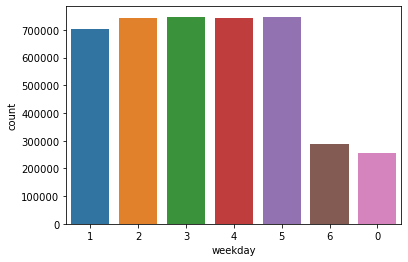

In [8]:
df['weekday'] = [x.strftime('%w') for x in df['Start_Time']]
ax = sns.countplot('weekday', data = df)

### 4.5 Accident Occurance Time

From the graph it is obvious that the accidentstook place mostly on daytime, this could be beacuse of number of travels over the day. Additionally, it appears that morning and evening are times where most accidents took place.</br>

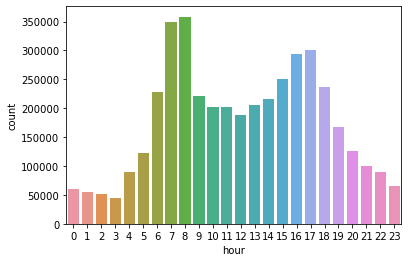

In [9]:
df['hour'] = [x.hour for x in df['Start_Time']]
ax = sns.countplot('hour', data = df)

### 4.6- Sunrise_Sunset / Severity

Considering total number of accidents it seems the percentage of severe accidents (Level 4) in Nights is more than Day time

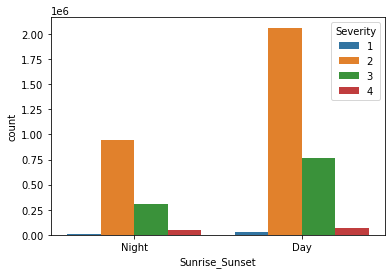

In [10]:
ax = sns.countplot('Sunrise_Sunset', data = df, hue = 'Severity')

### 4.7 Accident distribution over States
Top five states where most accidents have been reported are CA, TX, FL, SC, and NC.

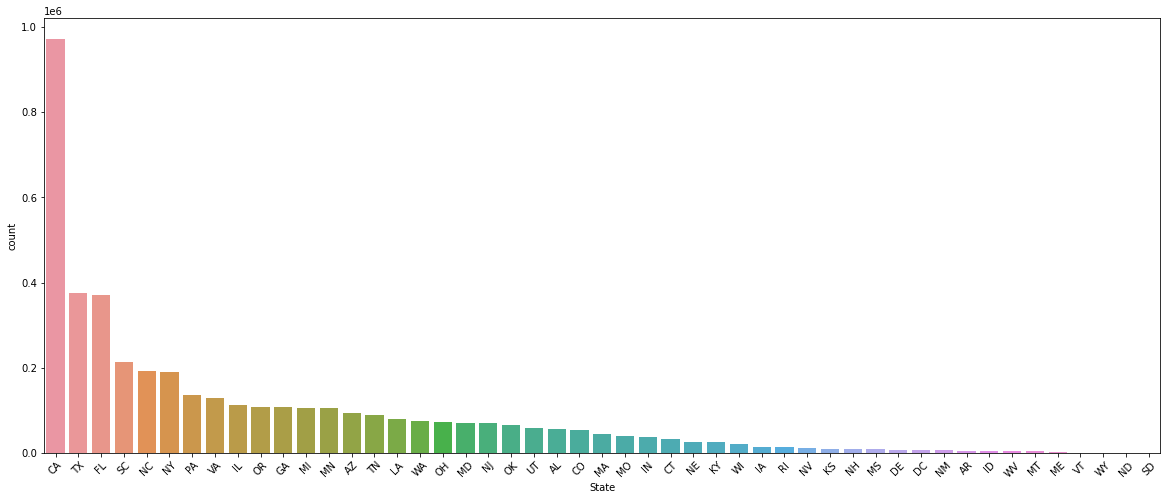

In [11]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
ax = sns.countplot('State', data = df, order = df['State'].value_counts().index)

### 4.8- Accidents Duration / Severity

Below boxplots shows the duration of accidents based on severity for each dataset seperately. As expected severity 4 is the longest among other severity levels. 

Text(0.5, 1.0, 'MapQuest-Bing')

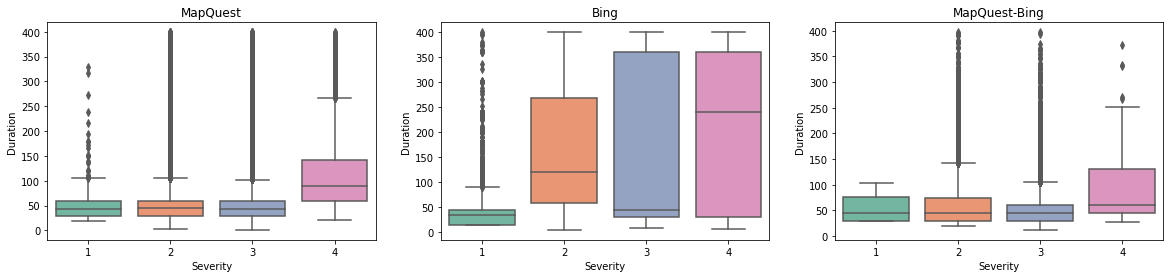

In [12]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 4))
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="MapQuest") & (df['Duration']<400),], palette="Set2", ax=axs[0])

sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="Bing") & (df['Duration']<400),], palette="Set2", ax=axs[1])

sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="MapQuest-Bing") & (df['Duration']<400),], palette="Set2", ax=axs[2])


axs[0].set_title('MapQuest')
axs[1].set_title('Bing')
axs[2].set_title('MapQuest-Bing')

### 4.9- Impacted Distance by Severity
The length of the road extent affected by the accident.
Blow boxplots shows the distance/serverity for each data source seperately. Among these 3 datasets, the MapQuest and Bing seems to be reasonable as the length of impacted road distance is larger than others for accidents severity level 4.<br>
Further investigation is needed to see if there is any relation between severity and day/night and weather condition, distance from origin departure and to destination.

Text(0.5, 1.0, 'MapQuest-Bing')

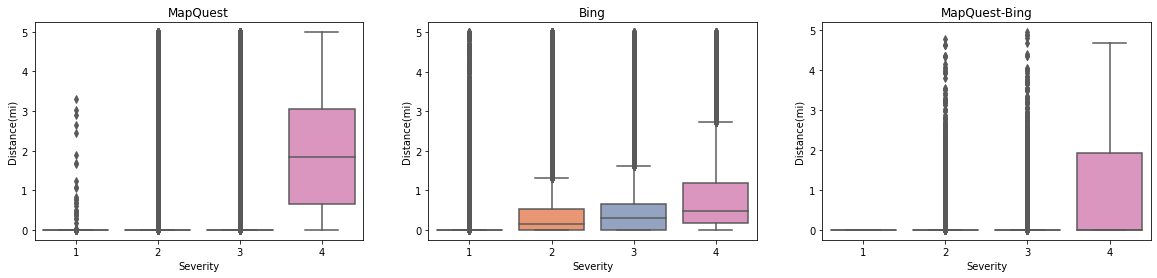

In [13]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 4))
sns.boxplot(x="Severity", y="Distance(mi)", 
            data=df.loc[(df['Source']=="MapQuest") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[0])

sns.boxplot(x="Severity", y="Distance(mi)",
            data=df.loc[(df['Source']=="Bing") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[1])


sns.boxplot(x="Severity", y="Distance(mi)",
            data=df.loc[(df['Source']=="MapQuest-Bing") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[2])

axs[0].set_title('MapQuest')
axs[1].set_title('Bing')
axs[2].set_title('MapQuest-Bing')

## 5- Sub-dataset selection

As expialned before, the MapQuest and Bing sub-datasets show more resonable result. Additionally considering CPU and Memory constraing for this project the Bing dataset is selected to continue with model creation. Moving forward similar EDA for this sub-dataset can also be created.

In [14]:
print(df['Source'].value_counts())
df = df[df['Source'] == 'Bing']

MapQuest         2651861
Bing             1516064
MapQuest-Bing      64616
Name: Source, dtype: int64


## 6- Data Engineering

Road type is an important factor in accident predictaion. For this street feature content is extracted to find the road types and their correlation to the accident severity.

In [15]:
# Create a list of top 40 most common words in street name

st_type =' '.join(df['Street'].unique().tolist())            # flat the array of street name
st_type = re.split(" |-", st_type)                           # split the long string by space and hyphen
st_type = [x[0] for x in Counter(st_type).most_common(40)]   # select the 40 most common words
print(st_type)

['', 'Rd', 'St', 'Ave', 'Dr', 'N', 'S', 'W', 'E', 'Blvd', 'Highway', 'Ln', 'Hwy', 'State', 'SW', 'NW', 'Pkwy', 'Road', 'NE', 'US', 'Way', 'Route', 'SE', 'Ct', 'Old', 'Creek', 'County', 'Pl', 'Lake', 'Hill', 'Cir', 'Park', 'Valley', 'I', 'Trl', 'Pike', 'River', 'Mill', 'Ridge', 'Avenue']


In [16]:
# Remove some irrelevant words and add spaces and hyphen back
st_type= [' Rd', ' St', ' Dr', ' Ave', ' Blvd', ' Ln', ' Highway', ' Pkwy', ' Hwy', 
          ' Way', ' Ct', 'Pl', ' Road', 'US-', 'Creek', ' Cir',  'Route', 'I-', 'Trl', 'Pike', ' Fwy']

In [17]:
street_type = []
for str in df['Street']:
    flag = False
    for item in st_type:        
        if item in str:
            flag = True
            type_ = item
    

    if(flag == True):
        street_type.append(type_)
    else:
        street_type.append(None)

df['Street2'] = [x for x in street_type]  


### 6.1 Street type correlation matrix

Street type <strong>"I"</strong> has the higher correlation <strong>(0.28)</strong> to the acccident <strong>Severity</strong>, Second is <strong>"Rd"</strong> with a correlation of <strong>0.11</strong>.

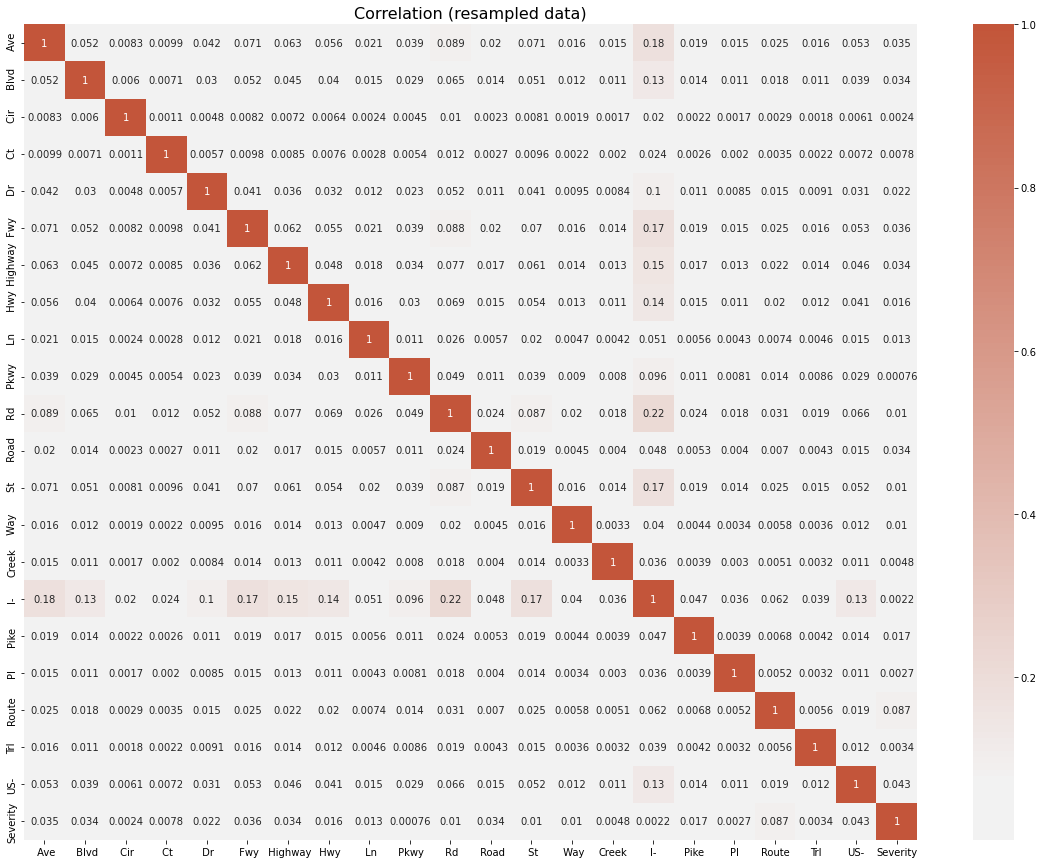

In [18]:
df_street = pd.get_dummies(df['Street2'])
df_n = pd.concat([df_street, df[['Severity']]], axis = 1)
street_corr = df_n.corr().abs()
plt.figure(figsize=(20,15))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(street_corr, annot=True, cmap=cmap, center=0).set_title("Correlation (resampled data)", fontsize=16)
plt.show()

### 6.2.1- WeekDay correlation matrix

There is no strong relationship between accident severity and the weekday.

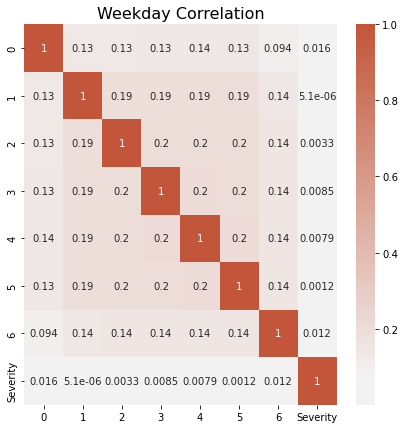

In [19]:
df_weekday = pd.get_dummies(df['weekday'])
df_n = pd.concat([df_weekday, df[['Severity']]], axis = 1)
street_corr = df_n.corr().abs()
plt.figure(figsize=(7,7))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(street_corr, annot=True, cmap=cmap, center=0).set_title("Weekday Correlation", fontsize=16)
plt.show()

### 6.2.2- WeekDay correlation matrix
There is no strong correlation between week days and accident level 4, except the weekday 6 has the lowest correlation of 0.12 and other days with 0.15.

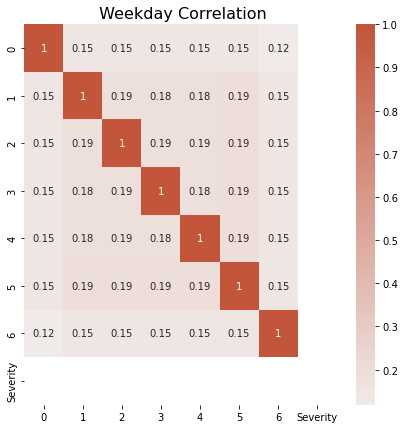

In [20]:
df_s4 = df[df['Severity']==4]
df_weekday = pd.get_dummies(df_s4['weekday'])
df_n = pd.concat([df_weekday, df_s4[['Severity']]], axis = 1)
street_corr = df_n.corr().abs()
plt.figure(figsize=(7,7))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(street_corr, annot=True, cmap=cmap, center=0).set_title(" Weekday Correlation", fontsize=16)
plt.show()

## 7- Feature Selection

### 7.1- Drop columns with more than %40 null values

In [21]:
total_counts = df.shape[0]
df_null = pd.DataFrame(df.isna().sum(), columns = ['counts'])
column_drop = ['ID', 'Source', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng'
               , 'Description', 'City', 'Zipcode', 'Country' 
               , 'Airport_Code', 'Weather_Timestamp', 'Start_Time', 'End_Time','County']   #Carriy no useful information

null_columns = {}
for index, row in df_null.iterrows():
    counts = row['counts']
    
    pct = round(counts/total_counts*100, 2)
    if(pct >= 40):
        print(f'{index}: %{pct}')
        column_drop.append(index)
        
    elif(counts !=0):
        null_columns[index] = counts

print('Dataset shape before: ',df.shape)
df.drop(columns= column_drop, inplace=True)
print('Dataset shape after: ', df.shape)    

TMC: %100.0
Number: %69.0
Dataset shape before:  (1516064, 55)
Dataset shape after:  (1516064, 38)


In [22]:
null_columns

{'City': 83,
 'Zipcode': 935,
 'Timezone': 2302,
 'Airport_Code': 4248,
 'Weather_Timestamp': 30264,
 'Temperature(F)': 43033,
 'Wind_Chill(F)': 449316,
 'Humidity(%)': 45509,
 'Pressure(in)': 36274,
 'Visibility(mi)': 44211,
 'Wind_Direction': 41858,
 'Wind_Speed(mph)': 128862,
 'Precipitation(in)': 510549,
 'Weather_Condition': 44007,
 'Sunrise_Sunset': 83,
 'Civil_Twilight': 83,
 'Nautical_Twilight': 83,
 'Astronomical_Twilight': 83,
 'Street2': 226083}

In [23]:
df = df.fillna(method="ffill")           # Fill na values using "ffill" method
df.isna().sum().sum()

1

## 7.2 - Important Features

In [24]:
print(df.columns)
print(len(df.columns))

Index(['Severity', 'Distance(mi)', 'Street', 'Side', 'State', 'Timezone',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Duration', 'year', 'month', 'weekday', 'hour',
       'Street2'],
      dtype='object')
38


## 7.3- Convert categorical features to dummy features

In [25]:
df_target = pd.DataFrame(df['Severity'] , columns = ['Severity'])
Cat = ['Side', 'State', 'Timezone', 'Wind_Direction', 'Weather_Condition', 'Amenity','Bump','Crossing'
       ,'Give_Way', 'Junction', 'No_Exit','Railway', 'Roundabout','Station','Stop','Traffic_Calming','Turning_Loop'
       ,'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Nautical_Twilight','hour','month','year','weekday']
df_dummies= pd.get_dummies(df[Cat])
df = pd.concat([df_dummies, df_target], axis=1)
del df_dummies
df.shape

(1516064, 226)

## 7.4- Drop features with more 0.9 correlation

In [26]:
%%time
corr_matrix = df.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df.drop(to_drop, axis=1, inplace=True)

Wall time: 4min 45s


## 8- Model Training 

 As the target value is of classification with four different accident severity levels, Decision trees and RandomForestClassifier are selected to be trained and evaluated for their performance on accident severity prediction.

## 8.1 Decision trees

Nowadays, decision tree analysis is considered a supervised learning technique we use for regression and classification.
The ultimate goal is to create a model that predicts a target variable by using a tree-like pattern of decisions. Essentially, decision trees mimic human thinking, which makes them easy to understand.

What Are the Advantages of Decision Trees?
* Decision trees are easy to understand. Because of their structure, which follows the natural flow of human thought, most people will have little trouble interpreting them. In addition, visualizing the model is effortless and allows you to see exactly what decisions are being made.

* There is little to no need for data preprocessing. Unlike other algorithms, decision trees take less time to model as they require less coding, analysis, or even dummy variables. The reason is that the technique looks at each data point individually instead of the set as a whole.

* Versatile when it comes to data. In other words, standardizing the collected data is not a necessity.Both numerical and categorical data can be imbune into the model as it’s able to work with features of both types.

#### 8.1.1  Feature Split

In [27]:
features = list(df.columns)
features.remove('Severity')
target = ['Severity']
X = df[features]                       
y = df[target] 


#### 8.1.2 Split dataset into training and traget sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)
print('Total: ', df.shape)

Train:  (1212851, 219) (1212851, 1)
Test:  (303213, 219) (303213, 1)
Total:  (1516064, 220)


#### 8.1.3 DecisionTreeClassifier Training

In [29]:
%%time
decisiontree = DecisionTreeClassifier(random_state=0)
dt_model = decisiontree.fit(X_train, y_train)

Wall time: 1min 44s


#### 8.1.4- DecisionTreeClassifier Model Performance on Test dataset:

Overall the DecisionTreeClassifier model is able to show %82 accuracy for all severity levels, however for the target severity level 4 its sensitivity is %46. This means model evaluates %54 level 4 accidents as lower levels mostly level 2.

Accuracy: %82
Sensitivity: %46

accuracy_score: 0.825
Severity 4 Sensitivity: 0.464 

confusion_matrix:
 [[  3327   1701    341    156]
 [  1967 221290  11944   7634]
 [   456  13506  14908   3387]
 [   180   8513   3251  10652]]


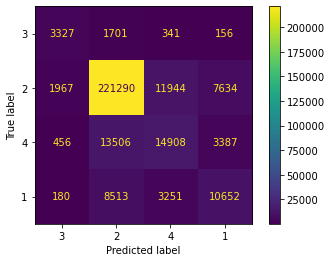

In [30]:
y_pred = dt_model.predict(X_test)
acc_score = accuracy_score(y_true = y_test , y_pred = y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=dt_model.classes_)
sensitivity =  round((14939/(432+13420+14939+3431)),3)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=list(df['Severity'].unique()))

print(f'accuracy_score: {round(acc_score,3)}')
print(f'Severity 4 Sensitivity: {sensitivity}','\n')
print('confusion_matrix:\n',conf_matrix)
cmd.plot()

### 8.2 RandomForestClassifier

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

Advantages and Disadvantages of Random Forest
It reduces overfitting in decision trees and helps to improve the accuracy. It is flexible to both classification and regression problems. It works well with both categorical and continuous values. It automates missing values present in the data.

#### 8.2.1 RandomForestClassifier Training

In [31]:
%%time
#from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

Wall time: 17min 13s


RandomForestClassifier()

#### 8.2.4- RandomForestClassifier Model Performance on Test dataset:

Severity 4 Sensitivity: 0.444
accuracy_score: 0.854 

confusion_matrix:
 [[  3035   2148    275     67]
 [  1062 231936   6224   3613]
 [   239  16163  13947   1908]
 [   116  10429   2112   9939]]


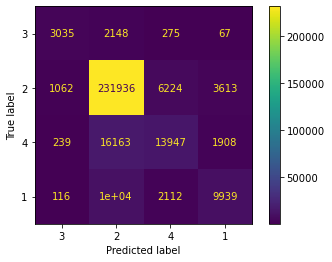

In [32]:
y_pred = rf.predict(X_test)
acc_score = accuracy_score(y_true = y_test , y_pred = y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=rf.classes_)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=list(df['Severity'].unique()))
sensitivity =  round((10168/(128  +10469   +2157  +10168)),3)

print(f'Severity 4 Sensitivity: {sensitivity}')
print(f'accuracy_score: {round(acc_score,3)}','\n')
print('confusion_matrix:\n',conf_matrix)
cmd.plot()

### 9- Two Level Serverity

The overall models accuracies were %82 for DecisionTreeClassifier and %85 for DecisionTreeClassifier with sensitivities of %46 and %44 respectively. As the aim of study is to improve the prediction performance for accident severity level 4, we will convert the 4 level categorical target value into a boolean target having 1 for level4 and 0 of the others. Then the models performance will be evaluated.

#### 9.1 Tagret feature convertion into boolean value

In [33]:
df['Severity'] = [f'Severity{i}' for i in df['Severity']]
df_severity = pd.get_dummies(df['Severity'])
df = pd.concat([df, df_severity], axis = 1)
df = df.drop(columns = ['Severity','Severity1','Severity2','Severity3'])

#### 9.1.1 Split dataset into training and traget sets

In [34]:
X = df.drop(columns = ['Severity4'])                      
y = df[['Severity4']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)
print('Total: ', df.shape)

Train:  (1212851, 219) (1212851, 1)
Test:  (303213, 219) (303213, 1)
Total:  (1516064, 220)


#### 9.1.2 Two Levels DecisionTreeClassifier Training

In [35]:
%%time
decisiontree = DecisionTreeClassifier(random_state=0)
dt_model_binary = decisiontree.fit(X_train, y_train)

Wall time: 1min 55s


#### 9.1.3- Two Levels DecisionTreeClassifier Model Performance on Test dataset:

The model shows improvement on both accuracy from %82 to %92 and slightly on sensitivity from %46 to %47 as compared to 4 levels DecisionTreeClassifier model.

accuracy_score: 0.921
Severity 4 Sensitivity: 0.475 

confusion_matrix:
 [[268510  11914]
 [ 12099  10690]]


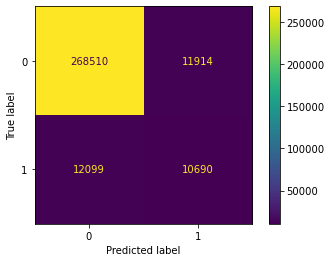

In [36]:
y_pred = dt_model_binary.predict(X_test)
acc_score = accuracy_score(y_true = y_test , y_pred = y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=dt_model_binary.classes_)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=list(df['Severity4'].unique()))
sensitivity =  round((10761/(11913 + 10761)),3)

print(f'accuracy_score: {round(acc_score,3)}')
print(f'Severity 4 Sensitivity: {sensitivity}','\n')
print('confusion_matrix:\n',conf_matrix)
cmd.plot()

### 9.2 Two Levels RandomForestClassifier Training

In [37]:
%%time
#from sklearn.ensemble import RandomForestClassifier
rf_binary = RandomForestClassifier()
rf_binary.fit(X_train, y_train)

Wall time: 16min 23s


RandomForestClassifier()

#### 9.2.1- Two Levels DecisionTreeClassifier Model Performance on Test dataset:

accuracy_score: 0.941
Severity 4 Sensitivity: 0.475 

confusion_matrix:
 [[276512   3912]
 [ 13967   8822]]


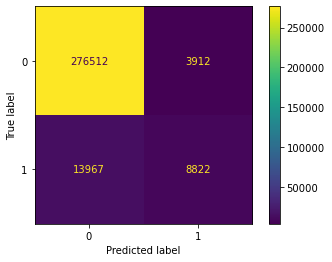

In [38]:
y_pred = rf_binary.predict(X_test)
acc_score = accuracy_score(y_true = y_test , y_pred = y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=rf_binary.classes_)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=list(df['Severity4'].unique()))
sensitivity =  round((10761/(11913 + 10761)),3)

print(f'accuracy_score: {round(acc_score,3)}')
print(f'Severity 4 Sensitivity: {sensitivity}','\n')
print('confusion_matrix:\n',conf_matrix)
cmd.plot()

# Conslusion:


The USA Car Accidents Severity includes three different sub-datasets MapQuest, Bing, and MapQuest-Bing all with the same features. Overall the main dataset has 4232541 observations and 49 different features in five main categories. This dataset selection is done considering the data validity. Among these 3 datasets, MapQuest and Bing seem to be reasonable as the length of impacted road distance is larger than others for accident severity level 4. Because of memory and CPU constraints, the focus of this study is limited to the Bing sub-dataset with 1516064 observations.<br><br>
After thoroughly examining the dataset, we can see that the number of accidents has had a steady increment over the past years. Also, most of the incidents took place in the last 4 months of each year, however, the weekends are days with less number of incidents. Moving in-depth analysis, we can see that daytime is worse than night having more incidents reported, however, most level 4 accidents took place mostly at night. Another important factor is the road type feature which shows mostly road types "I" and "Rd" have a high correlation to the severity level.<br><br>
As the target value is categorical the Decision Tree and the Random Forest classifier have been selected to be trained and evaluated. These two models have the same concept and are easy to understand. Initially, the models were applied to four level severities both approximately show close performances: accuracy of %82.2 and sensitivity of %46.4 for the Decision Tree and accuracy %85.2 and sensitivity %44.4 for the Random Forest. Even though both models have an acceptable accuracy of more than %70 but with a sensitivity of less than %50. Low sensitivity is an issue that could lead the model to wrongly predict level 4 accidents as lower levels. Therefore, to increase the sensitivity an approach is designed where the target value levels are converted into a Boolean value of 1 for severity 4 and 0 for the rest, then the same models are re-trained and examined.<br><br>
Once the target value is limited to only level 4 as One and others as Zero, the Decision Tree shows an accuracy of %92.1 and a sensitivity of %47.5. On the other hand, the Random Forest Classifier model shows an accuracy of %94 and a sensitivity of %47.<br><br>
Moreover, comparing the model performances the Random Forest Classifier shows a higher performance for two-level severity. The following table shows performances for the described four models above.



<table>
  <tr>
    <th>Target Levels</th>
    <th>Model Name</th>
    <th>Accuracy Score</th>
    <th>Sensitivity</th>
  </tr>
  <tr>
    <td>4 Levels</td>
    <td>DecisionTreeClassifier</td>
    <td>%82.2</td>
    <td>%46.4</td>
  </tr>
  <tr>
    <td>4 Levels</td>
    <td>RandomForestClassifier</td>
    <td>%85.2</td>
    <td>%44.4</td>
  </tr>
    
  <tr>
    <td>2 Levels</td>
    <td>DecisionTreeClassifier</td>
    <td>%92.1</td>
    <td>%47.5</td>
  </tr>
  <tr>
    <td>2 Levels</td>
    <td>RandomForestClassifier</td>
    <td>%94.1</td>
    <td>%47.5</td>
  </tr>
</table>

Finally, the two-level Random Forest Classifier can be selected for predicting a possible accident severity level. Having feature values in hand we can make predictions and then get back and make improvements on the main contributors. This way the impact of the high-risk accidents can be minimized.

